# Life Expectancy Prediction

Report by Mary Etokwudo, Dec 2022


The World Health Organization (WHO) keeps track of the health status for many countries in the world. The
purpose of this challenge is to create an explainable supervised learning model to predict the outcome
variable `Life_Expectancy` from other health factors collected in 193 countries of the world by WHO in 2015.

## 1. Loading data and preliminary analysis

Load the file `supervised.csv` in Pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset
df = pd.read_csv('supervised.csv')

In [3]:
# view some data from the dataset
df.head()

,Country,Status,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_Expectancy
0,Afghanistan,Developing,263,62,71.279624,65,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,74,0,364.975229,99,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,Developing,19,21,0.000000,95,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,0.000000,64,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,0.000000,94,0,62.8,9,93,94,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,76.3


### 1.1. Checking the target

**Examine the target attribute**

In [4]:
# create a series of the target attribute
y = df['Life_Expectancy']

# create dataframe of y
y_df = df[['Life_Expectancy']]
# eamine the dataframe
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Life_Expectancy  130 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


**Discuss whether the target attribute is numerical or nominal.**  
The target attribute `Life_Expectancy` is numerical.

**Discuss whether the supervised problem is a classification or a regression task.**  
Since the target attribute is numerical, the supervised learning problem is a regression task.

**If the target is numerical, discuss its frequency distribution.**  
Using matplotlib histogram `hist` plot

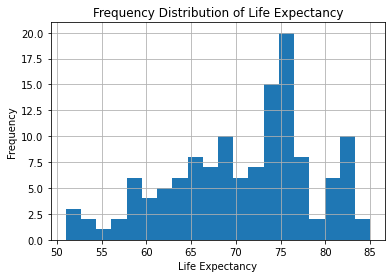

In [5]:
plt.hist(y_df['Life_Expectancy'], bins=20);

plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Life Expectancy')
plt.grid(True)
plt.show()

The frequency chart above shows that the most frequent values are around 75 (between 74 and 76), having a frequency as high as 20.

### 1.2. Checking the features 

**After removing the target, all remaining attributes are your features (independent variables).**

In [6]:
X = df.drop(['Life_Expectancy'], axis=1)

In [7]:
X.head()

,Country,Status,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,263,62,71.279624,65,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,Developing,74,0,364.975229,99,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,Developing,19,21,0.000000,95,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,Developing,335,66,0.000000,64,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Argentina,Developing,116,8,0.000000,94,0,62.8,9,93,94,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3


**Discuss the shape of the feature data, how many rows and columns does it contain?**

In [8]:
X.shape

(130, 18)

Before checking if the features are standardised, I would like to drop the columns that are not relevant to the modelling and also convert categorical features to numeric.

**Dropping irrelevant columns**

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          130 non-null    object 
 1   Status                           130 non-null    object 
 2   Adult Mortality                  130 non-null    int64  
 3   infant deaths                    130 non-null    int64  
 4   percentage expenditure           130 non-null    float64
 5   Hepatitis B                      130 non-null    int64  
 6   Measles                          130 non-null    int64  
 7   BMI                              130 non-null    float64
 8   under-five deaths                130 non-null    int64  
 9   Polio                            130 non-null    int64  
 10  Diphtheria                       130 non-null    int64  
 11  HIV/AIDS                         130 non-null    float64
 12  GDP                   

The `Country` column does not seem to have any role to play other than being an index or an identifier. Also, it is a categorical feature which would not be needed in a regression model. Therefore, it will be dropped.

Also, `percentage expenditure` has just two values asides zero. This is just for 2 rows out of 130. This makes the feature unuseful for analysis and modelling. Let's check if there are other columns that have high number of zeros.

In [10]:
#  Get the count of all non zero values in each column
print('Count of non zeros in each column')
for column_name in X.columns:
    column = X[column_name]
    count_of_non_zeros = (column != 0).sum()
    print(column_name, '-', count_of_non_zeros)

Count of non zeros in each column
Country - 130
Status - 130
Adult Mortality - 130
infant deaths - 94
percentage expenditure - 2
Hepatitis B - 130
Measles - 85
BMI - 130
under-five deaths - 98
Polio - 130
Diphtheria - 130
HIV/AIDS - 130
GDP - 130
Population - 130
thinness  1-19 years - 130
thinness 5-9 years - 130
Income composition of resources - 130
Schooling - 130


The `percentage expenditure` feature has just 2 non-zero values, out of 130 observations. Zero values can mean missing values in this case. This will badly affect our modelling.

In [11]:
X['percentage expenditure'].unique()

array([ 71.27962362, 364.9752287 ,   0.        ])

In [12]:
# drop the 'percentage expenditure' and 'Country' columns
X.drop(['percentage expenditure', 'Country'], axis = 1, inplace = True) 

**Transforming non-numerical feature into numerical**

Regression requires all the independent variables to be numeric. The dataset has one categorical variable `Status` which can be converted to a numerical variable.

The `Status` feature has two categorical values which are 'Developing' and 'Developed'. These values can be represented as numerical values 0 and 1.

In [13]:
status_values = X['Status'].unique()
status_values

array(['Developing', 'Developed'], dtype=object)

Using the `LabelEncoder` method of sklearn. Since there are just two `Status` values, the result will be 0 and 1.

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
number = LabelEncoder()

In [16]:
X['Status'] = number.fit_transform(X['Status'].astype('str'))

In [17]:
X.head()

,Status,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,74,0,99,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,1,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,1,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,1,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3


The LabelEncoder transformed 'Developing' to 1 and 'Developed' to 0.

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           130 non-null    int64  
 1   Adult Mortality                  130 non-null    int64  
 2   infant deaths                    130 non-null    int64  
 3   Hepatitis B                      130 non-null    int64  
 4   Measles                          130 non-null    int64  
 5   BMI                              130 non-null    float64
 6   under-five deaths                130 non-null    int64  
 7   Polio                            130 non-null    int64  
 8   Diphtheria                       130 non-null    int64  
 9   HIV/AIDS                         130 non-null    float64
 10  GDP                              130 non-null    float64
 11  Population                       130 non-null    float64
 12  thinness  1-19 years  

Now all the independent features are numeric

In [19]:
X.shape

(130, 16)

The feature data now has 130 rows and 16 columns.

**Discuss whether features are standardised.**

In [20]:
X.describe()

,Status,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000,130.000000,130.000000,130.000000
mean,0.853846,158.676923,27.723077,80.653846,1773.315385,40.533077,36.761538,81.123077,82.846154,0.785385,5997.928670,1.163121e+07,4.680769,4.780769,0.674792,12.746923
std,0.354627,99.484969,96.426702,24.992933,9130.704172,21.196345,123.951904,25.435133,23.289370,1.520206,10101.952401,3.017667e+07,4.380632,4.477144,0.151216,2.760159
min,0.000000,1.000000,0.000000,6.000000,0.000000,2.500000,0.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,5.400000
25%,1.000000,79.000000,0.000000,77.250000,0.000000,23.325000,1.000000,78.250000,78.000000,0.100000,702.333884,2.423205e+05,1.525000,1.550000,0.550500,10.800000
50%,1.000000,145.500000,3.000000,91.000000,16.500000,41.300000,3.000000,91.500000,92.500000,0.100000,2231.867706,1.894576e+06,3.400000,3.450000,0.701500,12.750000
75%,1.000000,215.000000,20.500000,96.000000,210.500000,61.200000,25.500000,97.000000,97.000000,0.500000,6311.780768,1.095208e+07,6.500000,6.575000,0.784000,14.675000
max,1.000000,484.000000,910.000000,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,56554.387600,2.581621e+08,26.700000,27.300000,0.937000,20.400000


The features are not standardised. The mean and standard deviation of the numerical features are not 0 and 1, respectively.

In [21]:
# saving a copy of the dataset for future reference
X_copy = X.copy()

## 2. Training and testing a machine learning pipeline

### Pipeline Containing Linear Regression

I am proposing a linear regression model to predict the target feature. The following are the steps to be taken in the linear regression pipeline:  
1. Data standardization (scaling)  
2. Polynomial transformation of features
3. Model training  

**Motivate your choices: why the proposed pipeline among the many?**  
I am making this choice because linear regession is the easiest and simplest of all the regression models. 

Before starting with the pipeline, I would like to check if linear regression can be a good model for this dataset. The 5 key assumptions of linear regression are:  

1. No multicollinearity of predictors
2. Linearity (the relationship between x and y is linear)

The other 3 assumptions below would be tested for after fitting the regrssion line and getting the residuals.

3. Independence of residuals (no autocorrelation).

4. Homoscedasticity.

5. Normality of residuals.

If one or more of these assumptions are violated, then the results of our linear regression may be unreliable or even misleading. This would mean that linear regression is not a good model for this dataset.


### Checking for multicollinearity

Using pandas inbuilt corr() method

In [22]:
X.corr()

,Status,Adult Mortality,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,1.000000,0.311541,0.117142,-0.129949,0.072353,-0.324721,0.120709,-0.224017,-0.220499,0.187251,-0.458099,-0.036725,0.320532,0.325340,-0.538470,-0.536225
Adult Mortality,0.311541,1.000000,0.154840,-0.134546,0.027975,-0.351283,0.178261,-0.300425,-0.228731,0.632276,-0.314540,0.032840,0.254959,0.259090,-0.587776,-0.466075
infant deaths,0.117142,0.154840,1.000000,-0.075556,0.824389,-0.208357,0.993963,-0.120151,-0.106575,0.070195,-0.115139,0.269533,0.557387,0.555316,-0.197383,-0.215488
Hepatitis B,-0.129949,-0.134546,-0.075556,1.000000,0.034322,0.147275,-0.093338,0.503902,0.895829,-0.342678,0.088400,-0.045324,-0.038189,-0.086664,0.279625,0.304968
Measles,0.072353,0.027975,0.824389,0.034322,1.000000,-0.125854,0.787330,-0.013857,0.019518,-0.040197,-0.068698,0.125615,0.376052,0.367871,-0.057675,-0.062165
BMI,-0.324721,-0.351283,-0.208357,0.147275,-0.125854,1.000000,-0.218591,0.198913,0.167397,-0.265041,0.387052,0.005963,-0.487245,-0.505187,0.622817,0.612644
under-five deaths,0.120709,0.178261,0.993963,-0.093338,0.787330,-0.218591,1.000000,-0.138411,-0.126753,0.097053,-0.120094,0.308769,0.547162,0.543834,-0.220828,-0.236128
Polio,-0.224017,-0.300425,-0.120151,0.503902,-0.013857,0.198913,-0.138411,1.000000,0.577022,-0.375415,0.218366,-0.233270,-0.175525,-0.176887,0.442925,0.387310
Diphtheria,-0.220499,-0.228731,-0.106575,0.895829,0.019518,0.167397,-0.126753,0.577022,1.000000,-0.406572,0.200140,-0.053164,-0.080184,-0.131753,0.397359,0.388661
HIV/AIDS,0.187251,0.632276,0.070195,-0.342678,-0.040197,-0.265041,0.097053,-0.375415,-0.406572,1.000000,-0.189537,0.016878,0.169583,0.148512,-0.475022,-0.392309


Also, using a seaborn heatmap 

<AxesSubplot:>

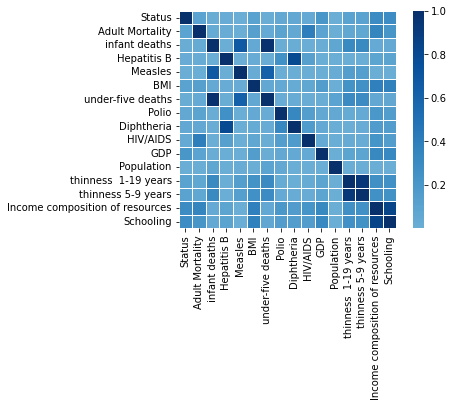

In [23]:
sns.heatmap(data = X.corr()**2,cmap="Blues", center=0, square=True, linewidths=.5)

There is multicollinearity in some of the features. For instance, from the correlation table, it shows that `Measles` and `infant deaths` have a high correlation of 0.824389, `Income composition of resources` and `Schooling` have a high correlation of 0.920759. These are also represented by the darker cells in the heatmap.  
The diagonal cells in the heatmap show relationship between a feature and itself. Therefore, it is not among the dark cells being referred to.  

We will be using VIF ( Variance Inflation Factor) to select only the features with little or no multicollinearity. Then we can test if they have a linear relationship with the target variable.

**VIF (Variance Inflation Factor) analysis.**  
The `statsmodels` library provides a method `variance_inflation_factor` for this.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

In [25]:
# Use numpy to get an array of the column names in the X table
column_names_array = np.array(X.columns)

# create a new dataframe having the column names and their VIF
vif = pd.DataFrame(data = column_names_array, columns=["attribute"])
vif['VIF'] = 0
for i in range(0, X.shape[1]):
    vif.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

# round the VIF values to 1 decimal place and print the vif dataframe
vif.round(1)

,attribute,VIF
0,Status,7.8
1,Adult Mortality,7.3
2,infant deaths,186.5
3,Hepatitis B,65.1
4,Measles,5.0
5,BMI,9.0
6,under-five deaths,159.1
7,Polio,20.6
8,Diphtheria,91.2
9,HIV/AIDS,2.5


With VIF > 5 there is an indication that multicollinearity may be present. With VIF > 10 there is certainly multicollinearity among the variables. We will only be working with the features that have VIF less than 10.

In [26]:
vif_noMulticol = vif[vif.VIF<10]
vif_noMulticol.reset_index(drop=True, inplace=True)
vif_noMulticol

,attribute,VIF
0,Status,7.838406
1,Adult Mortality,7.344876
2,Measles,5.039583
3,BMI,8.979786
4,HIV/AIDS,2.535291
5,GDP,2.160295
6,Population,1.701159


In [27]:
# filter the X dataframe to get only the attributes above
X = X.loc[:, vif_noMulticol.attribute]

In [28]:
X.shape

(130, 7)

### Checking for linear relationship between the predictors and the target

The next step is to use the features selected from the previous section to test for linearity.

In [29]:
# creata a dataframe for the Life_Expectancy attribute
y_df = pd.DataFrame({ 'Life_Expectancy': y})

Plot a scatter plot of each predictor against the target, using matplotlib 

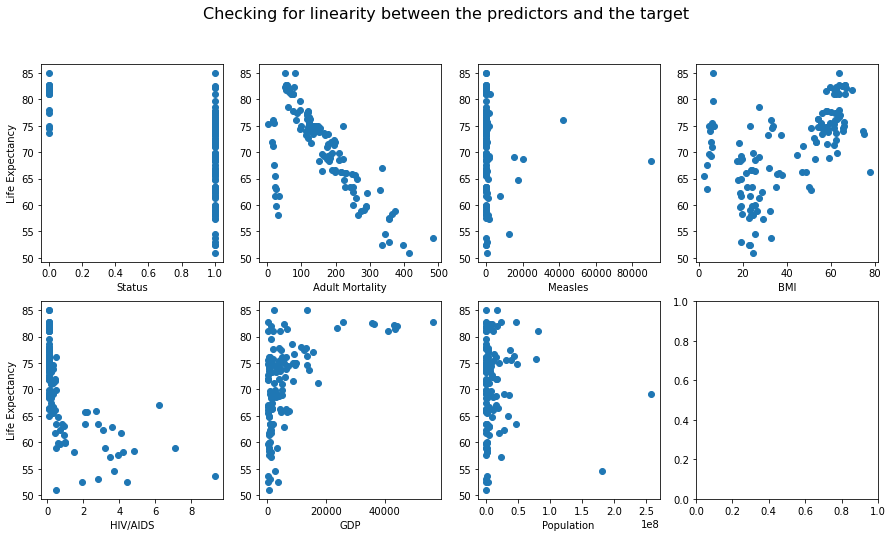

In [30]:
#  create subplots to manage space
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Checking for linearity between the predictors and the target', fontsize=16)

# Plot each predictor against the target
ax1.scatter(X['Status'], y_df['Life_Expectancy'])
ax1.set(xlabel='Status', ylabel='Life Expectancy')

ax2.scatter(X['Adult Mortality'], y_df['Life_Expectancy'])
ax2.set(xlabel='Adult Mortality')

ax3.scatter(X['Measles'], y_df['Life_Expectancy'])
ax3.set(xlabel='Measles')

ax4.scatter(X['BMI'], y_df['Life_Expectancy'])
ax4.set(xlabel='BMI')

ax5.scatter(X['HIV/AIDS'], y_df['Life_Expectancy'])
ax5.set(xlabel='HIV/AIDS', ylabel='Life Expectancy')

ax6.scatter(X['GDP'], y_df['Life_Expectancy'])
ax6.set(xlabel='GDP')

ax7.scatter(X['Population'], y_df['Life_Expectancy'])
ax7.set(xlabel='Population')

plt.show()

The plots above show that there's no linear relationship between almost all the predictors and the target. This means that a linear regression model will not be effective in this case. In the next section, we will introduce random forest as a better regressor.

## Pipeline Containing Random Forest Regression 

A pipeline containing random forest regression does not require data standardization. 

**Motivate your choices: why the proposed pipeline among the many?**  
Random forest regression is a preferred model in such a case where there are non-linear relationships between predictors and target, and there is multicollinearity.

**Explain whether your proposed pipeline standardises the feature data.**  
Random forest regression does not require that data be standardised.

**Explain whether your proposed pipeline transforms feature data and how**  
Random forest regression does not require transform of feature data.

Ramdom forest regression is not affected by multicollinearity, so we can re-introduce the variables we remove previously.

**Split your data needs into train and test.**

In [31]:
# Using the previously saved copy of X containing all the features
X = X_copy

In [32]:
X.columns

Index(['Status', 'Adult Mortality', 'infant deaths', 'Hepatitis B', 'Measles',
       'BMI', 'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Split data into train-test by using the `scikit-learn` module `train_test_split`.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [34]:
print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)

X_train.shape =  (104, 16)
X_test.shape =  (26, 16)


**Train your supervised learning model.**

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

**Show the accuracy of your model by using appropriate unseen data.**

**Model Evaluation (model accuracy):**  
Using coeffiecient of determination (R2 score), mean squared error (MSE) and mean absolute error (MAE)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

On train data:

In [38]:
# Use the model to get the y predictions using the X train data
y_train_preds = model.predict(X_train)

# use the evaluation metrics to compare the actual values to the predicted values
mse = mean_squared_error(y_train, y_train_preds)
mae = mean_absolute_error(y_train, y_train_preds)
train_r2_score = r2_score(y_train, y_train_preds)

In [39]:
print("r2_score = ", train_r2_score)
print("MSE = ", mse)
print("MAE = ", mae)

r2_score =  0.983054472835169
MSE =  1.063461913461534
MAE =  0.715298076923077


On test data:

In [40]:
# Use the model to get the y predictions using the X test data
y_test_preds = model.predict(X_test)

# use the evaluation metrics to compare the actual values to the predicted values
test_mse = mean_squared_error(y_test, y_test_preds)
test_mae = mean_absolute_error(y_test, y_test_preds)
test_r2_score = r2_score(y_test, y_test_preds)

In [41]:
print("r2_score = ", test_r2_score)
print("MSE = ", test_mse)
print("MAE = ", test_mae)

r2_score =  0.9113703745925678
MSE =  5.856232653846147
MAE =  1.7728846153846218


**Discuss whether you need to compare your accuracy to a baseline.**  

To know if an accuracy of 0.98 is good enough, we will be training a dummy regressor using mean as a strategy and use it as a baseline. We will be using sklearn `DummyRegressor`

In [42]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train)

DummyRegressor()

**Evaluating the dummy regressor using R2 score**

The best r2 score is 1 and constant r2 score is 0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0

In [43]:
y_pred_dummy_reg = dummy_reg.predict(X_test)
r2_score(y_test, y_pred_dummy_reg)

-0.00424812327598989

The dummy regressor always predict the r2_ score as approximately 0 for the mean. Therefore, the random forest regressor fits better than the dummy regressor in terms of r2_score. 

**Discuss whether your final model overfits or underfits.**

The R2 score is 0.9 on test data. This score is not far from the R2 score on the train data, 0.98. This implies that the model performs well on test data and there's no problem of underfitting or oveerfitting. It also means that the model has a good bias-variance trade-off.

## 3. Tuning the proposed machine learning pipeline (*Optional*) 

**Discuss whether your final feature space is low dimensional or high dimensional.**

In [44]:
X.shape

(130, 16)

The final feature space X is low dimensional. There are 16 features which is lower than the number of rows (130). The number of observatons is about 8 times the number of features.

**Explain whether the proposed pipeline requires any fine-tuned phase.**  

The model has a high accuracy and performs well on test data. Therefore, it does not require a fine-tune phase. 

**Explain whether your data needs to be split into train and test, k-fold, validation set, or what.**

For confirmation that the model does not need to be fine-tuned, we will do a k-fold cross validation.

Using sklearn method `cross_validate`

In [45]:
from sklearn.model_selection import cross_validate

In [46]:
cv_results = cross_validate(model, X, y, cv=5, # using 5 folds
                            scoring=('r2'), # return the r2 score
                            return_train_score=True)
cv_results

{'fit_time': array([0.14846015, 0.13945103, 0.14028502, 0.14113927, 0.14256597]),
 'score_time': array([0.01036692, 0.00997496, 0.01118112, 0.01004076, 0.01078105]),
 'test_score': array([0.9319544 , 0.91497657, 0.90927046, 0.91188209, 0.78714087]),
 'train_score': array([0.98455987, 0.98288647, 0.98404948, 0.98323219, 0.988804  ])}

Take the mean of the r2 scores for the train and test.

In [47]:
print("train_r2_score = ", cv_results['train_score'].mean())
print("test_r2_score = ", cv_results['test_score'].mean())

train_r2_score =  0.9847064032252826
test_r2_score =  0.8910448773904511


These values are almost the same with what was gotten previously.

**Discuss whether your final tuned model overfits or underfits.**

The tuned model performs well on train and test data. Therefore there is no overfitting and underfitting.

**Compare the accuracy of your final tuned model with the accuracy you got in the previous section (non-tuned model).**  
Comparing the train and test scores of the tuned model to that obtained in the previous section, the values are almost equal (when approximated to 2 decimal places). Therefore the cross vallidation was not necessary.

## 4. Model interpretation (*Optional*)

**Explain whether your proposed pipeline is human interpretable.**  

Random Forest Regression has a very poor human interpretability. Some machine learning models sacrifice accuracy for interpretability and random forest is one of them.

**Discuss whether features contain any multicollinearity and if this is a problem for your model interpretability.** 

As already mentioned in section 2, the features contain multicollinearity. This is not a problem for random forest regression though.

**Perform any analysis necessary to show which features are most responsible for generating the final predictions.**  

Random Forest Regression can be interpreted with feature importance provided by the sklearn regressor. This will also show which features are most responsible for generating the final predictions.

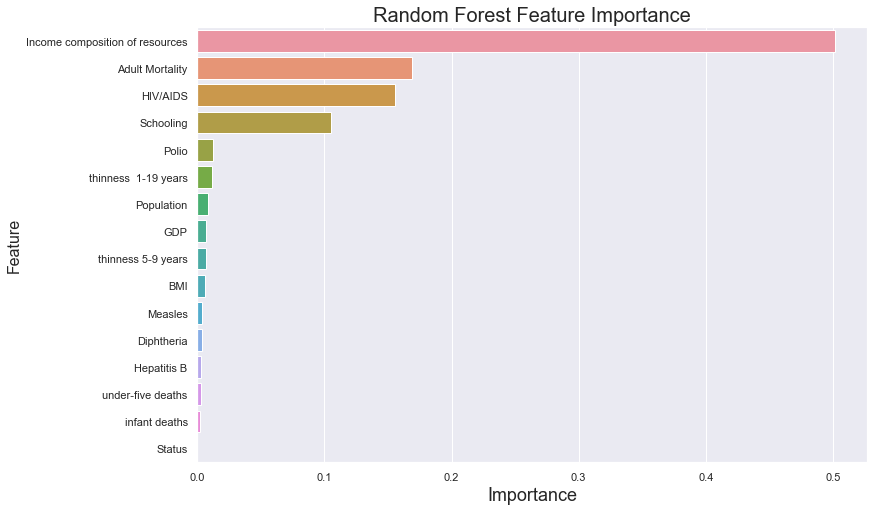

In [48]:
# crate a dataframe of features and their importance
features = pd.DataFrame({
    "feature": X.columns, 
    "importance": model.feature_importances_  # get feature importance from the model
})

# use seaborn to plot a bar chart of the features and their importance
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(
    x = "importance", 
    y = "feature", 
    data = features,
    order = features.sort_values('importance', ascending = False).feature
)

# use matplotlib to give the chart labels and title
plt.title("Random Forest Feature Importance", fontsize=20)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature', fontsize=16)
plt.show()

The above plot shows that concerning the features, for random forest, the most important features are `Income composition of resources`, `Adult Mortality`, `HIV/AIDS` and `Schooling`.

## 5. Discussion: pros/cons and time complexity of the designed pipeline

**Summarise the introduced pipeline in your own words.**  
The Random Forest pipeline used in this research is summarised as the following steps:
1. Test-train split  
2. Model training  
3. Model evaluation

**Introduce the time complexity of the full introduced pipeline.**

1. The time complexity of sklearn `train_test_split` function is close to O(n).  

2. Complexity of Random forest regression  
Where:  
n = number of training samples,  
m = number of features,  
k = number of trees  
d = depth of tree

Train Time Complexity = O(k * n * m * log(n))  
Test Time Complexity = O(m * k)  
Space Complexity = O(d * k)  
Run-time Complexity = O(d * k)


**Discuss which are the steps having the highest impact on time execution, especially to handle a larger dataset.**. 

The cross-validation step has the highest impact on execution time as it contains nested for loops. Also, if the dataset becomes larger and number of features increase, the time complexity also increases.

Therefore, the cross validation step should be skipped. Afterall, it does not make any difference to our model.

**Present its strengths and limitations.**  

The following are the limitations of Random Forest Regression
1. A large number of trees can make the algorithm too slow and ineffective for real-time predictions.  
2. Increased accuracy requires more trees but more trees slow down model.  

The following are the strengths
1. It is fast and simple  
2. It does not require a step on feature standardization  
3. The accuracy is not affected by multicollinearity.  

**Discuss any possible way to improve it.**

Random Forest is considered to be faster than other algorithms. To reduce the computational complexities of random forest, reducing the dimension of the feature data can be very effective.  
This implies that if we had used the features gotten from the section on VIF (no multicollinearity), the computational complexities would be lesser than they are currently.